# Explainability

In [2]:
import sklearn
import sklearn.ensemble
import numpy as np
import lime
import lime.lime_tabular
from __future__ import print_function
np.random.seed(1)
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")

In [3]:
train = pd.read_csv('C:/Users/Admin/Desktop/Magistrale/Primo anno/Secondo semestre/DM2/UCI HAR Dataset/csv_files/train.csv')
test = pd.read_csv('C:/Users/Admin/Desktop/Magistrale/Primo anno/Secondo semestre/DM2/UCI HAR Dataset/csv_files/test.csv')

In [16]:
# classe = {'Activity', 'ActivityName'}
attributes = [col for col in train.columns if col != 'Activity']
attributes.pop()
X_train = train[attributes].values
X_test = test[attributes].values
y_train = train['ActivityName']
y_test = test['ActivityName']

In [9]:
y_train

0               STANDING
1               STANDING
2               STANDING
3               STANDING
4               STANDING
              ...       
7347    WALKING_UPSTAIRS
7348    WALKING_UPSTAIRS
7349    WALKING_UPSTAIRS
7350    WALKING_UPSTAIRS
7351    WALKING_UPSTAIRS
Name: ActivityName, Length: 7352, dtype: object

In [5]:
from sklearn.ensemble import RandomForestClassifier

In [6]:
clf = RandomForestClassifier(n_estimators=200, min_samples_split=5, min_samples_leaf=15, max_depth=9, criterion='gini')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9185612487275195
F1-score [1.         0.89233954 0.9037037  0.91927825 0.88348271 0.89787234]
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.91      0.88      0.89       491
          STANDING       0.89      0.92      0.90       532
           WALKING       0.87      0.98      0.92       496
WALKING_DOWNSTAIRS       0.96      0.82      0.88       420
  WALKING_UPSTAIRS       0.90      0.90      0.90       471

          accuracy                           0.92      2947
         macro avg       0.92      0.91      0.92      2947
      weighted avg       0.92      0.92      0.92      2947



In [7]:
def bb_predict(X):
    return bb.predict(X)

def bb_predict_proba(X):
    return bb.predict_proba(X)

## LIME

In [36]:
# !pip install datamanager 
!pip install dataManager

In [13]:
from lime.lime_tabular import LimeTabularExplainer

In [19]:
target=train[["ActivityName"]]

In [24]:
lime_explainer = lime.lime_tabular.LimeTabularExplainer(X_train, feature_names=train.columns, class_names=target.ActivityName.unique(), discretize_continuous=True)

In [27]:
i = np.random.randint(0, X_test.shape[0])
exp = lime_explainer.explain_instance(X_test[0], clf.predict_proba, num_features=8, top_labels=1)

In [29]:
exp.local_exp

{2: [(50, 0.022192382362988018),
  (559, 0.02203865686059376),
  (41, 0.01794773411828746),
  (53, 0.0174988756487867),
  (52, 0.010478400936760914),
  (40, 0.010201457056634744),
  (381, -0.009546516508260798),
  (96, -0.009336066401319091)]}

In [28]:
exp.show_in_notebook(show_table=True, show_all=False)

## SHAP

In [37]:
# !pip install shap

     -------------------------------------- 435.6/435.6 KB 2.0 MB/s eta 0:00:00
     -------------------------------------- 40.8/40.8 KB 649.1 kB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 20.9
    Uninstalling packaging-20.9:
      Successfully uninstalled packaging-20.9


In [38]:
import shap

In [54]:
explainer = shap.TreeExplainer(clf) # Calculate Shap values
shap_values = explainer.shap_values(X_test)

In [55]:
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1][0,:], X_test[0,:])

In [57]:
shap.force_plot(explainer.expected_value[1], shap_values[1][:100,:], X_test[:100,:])

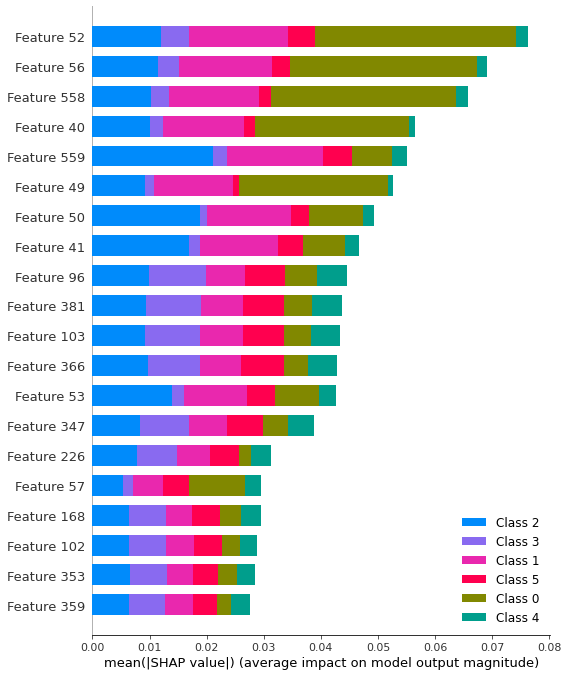

In [56]:
shap.summary_plot(shap_values, X_test)